
# Hipótese 1 — Ranking por UF no Programa PEAC

**Projeto Aplicado - GRUPO 19**  
**Objetivo:** Analisar o valor total contratado por Unidade da Federação (UF) no programa PEAC, identificando os estados com maior volume de crédito.


In [7]:

# %%
# === IMPORTAÇÃO DE BIBLIOTECAS ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Estilo dos gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# Caminhos
PASTA_DATA = "../Data"
PASTA_RESULTADOS = "../Resultados"

os.makedirs(PASTA_RESULTADOS, exist_ok=True)


In [8]:

# %%
# === LEITURA DO DATASET ===
arquivo_csv = os.path.join(PASTA_DATA, "PEAC2022.csv")
dados = pd.read_csv(arquivo_csv, sep=";", decimal=",", encoding="latin1")

# Padronizar colunas
dados.columns = dados.columns.str.lower().str.strip()

print(f"Dataset carregado com sucesso!")
print(f"Shape: {dados.shape}")
print(f"Colunas: {list(dados.columns)}")

dados.head()


Dataset carregado com sucesso!
Shape: (453688, 12)
Colunas: ['nome_agente_financeiro', 'cnpj_cpf_cliente', 'nome_cliente', 'porte_cliente', 'valor_credito', 'valor_garantido', 'valor_desembolsado', 'data_solicitacao_outorga', 'municipio_investimento', 'uf_investimento', 'municipio_sede_cliente', 'uf_sede_cliente']


,nome_agente_financeiro,cnpj_cpf_cliente,nome_cliente,porte_cliente,valor_credito,valor_garantido,valor_desembolsado,data_solicitacao_outorga,municipio_investimento,uf_investimento,municipio_sede_cliente,uf_sede_cliente
0,ITAU,**.*43.060/0001-**,FERAMAR DISTRIBUIDORA T P L ME,Média,1.000.000,800.000,1.000.000,2022-09-15,NITEROI,RJ,NITEROI,RJ
1,ITAU,**.*86.809/0001-**,MASTER S.P.R. INS ELETRICAS,Média,200.000,160.000,200.000,2022-09-15,PEDREIRA,SP,PEDREIRA,SP
2,ITAU,**.*62.167/0001-**,I E C RODRIGUES - ME,Média,200.000,160.000,200.000,2022-09-21,CAMAQUA,RS,CAMAQUA,RS
3,ITAU,**.*49.182/0001-**,CLINUTRI LTDA EPP,Média,200.000,160.000,200.000,2022-09-19,RECIFE,PE,RECIFE,PE
4,ITAU,**.*47.450/0001-**,UTILIDADES GOURMET COM EIRELI,Média,1.500.000,1.200.000,1.500.000,2022-09-23,JUNDIAI,SP,JUNDIAI,SP


In [9]:

# %%
# === PADRONIZAÇÃO E LIMPEZA ===
col_valor = [c for c in dados.columns if "valor" in c][0]
col_uf = [c for c in dados.columns if "uf" in c][0]

# Converter valores
dados[col_valor] = (
    dados[col_valor]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
)
dados[col_valor] = pd.to_numeric(dados[col_valor], errors="coerce")

# Remover linhas nulas
dados = dados.dropna(subset=[col_uf, col_valor])

print(f"Coluna de valor: {col_valor}")
print(f"Coluna de UF: {col_uf}")


Coluna de valor: valor_credito
Coluna de UF: uf_investimento


## 1) Ranking de Valor Total Contratado por UF

In [10]:

# %%
# === AGRUPAMENTO E ORDENAÇÃO ===
ranking_uf = (
    dados.groupby(col_uf, as_index=False)
    .agg(total_valor=(col_valor, "sum"))
    .sort_values("total_valor", ascending=False)
)
ranking_uf["valor_bi"] = ranking_uf["total_valor"] / 1e9

# Ordenar eixo
ranking_uf[col_uf] = pd.Categorical(
    ranking_uf[col_uf],
    categories=ranking_uf[col_uf],
    ordered=True
)

ranking_uf.head()


,uf_investimento,total_valor,valor_bi
25,SP,6.236820e+10,62.368196
17,PR,1.826296e+10,18.262964
10,MG,1.789545e+10,17.895445
23,SC,1.220928e+10,12.209279
18,RJ,1.091036e+10,10.910361


In [ ]:

# %%
# === GRÁFICO DE BARRAS ===
plt.figure(figsize=(14, 7))
sns.barplot(
    data=ranking_uf,
    x=col_uf,
    y="valor_bi",
    palette="viridis",
    order=ranking_uf[col_uf]
)

plt.title("Ranking por UF - Valor Total Contratado (PEAC)", fontsize=15, fontweight='bold')
plt.xlabel("Unidade da Federação (UF)", fontsize=12)
plt.ylabel("Valor Total Contratado (R$ bilhões)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar gráfico
caminho_grafico = os.path.join(PASTA_RESULTADOS, "hipotese1_ranking_uf.png")
plt.savefig(caminho_grafico, dpi=300, bbox_inches="tight")
plt.show()

print(f"Gráfico salvo em: {caminho_grafico}")



## 2) Tabela Resumo — Ranking por UF

A tabela abaixo exibe o valor total contratado (em bilhões de reais) por unidade da federação.


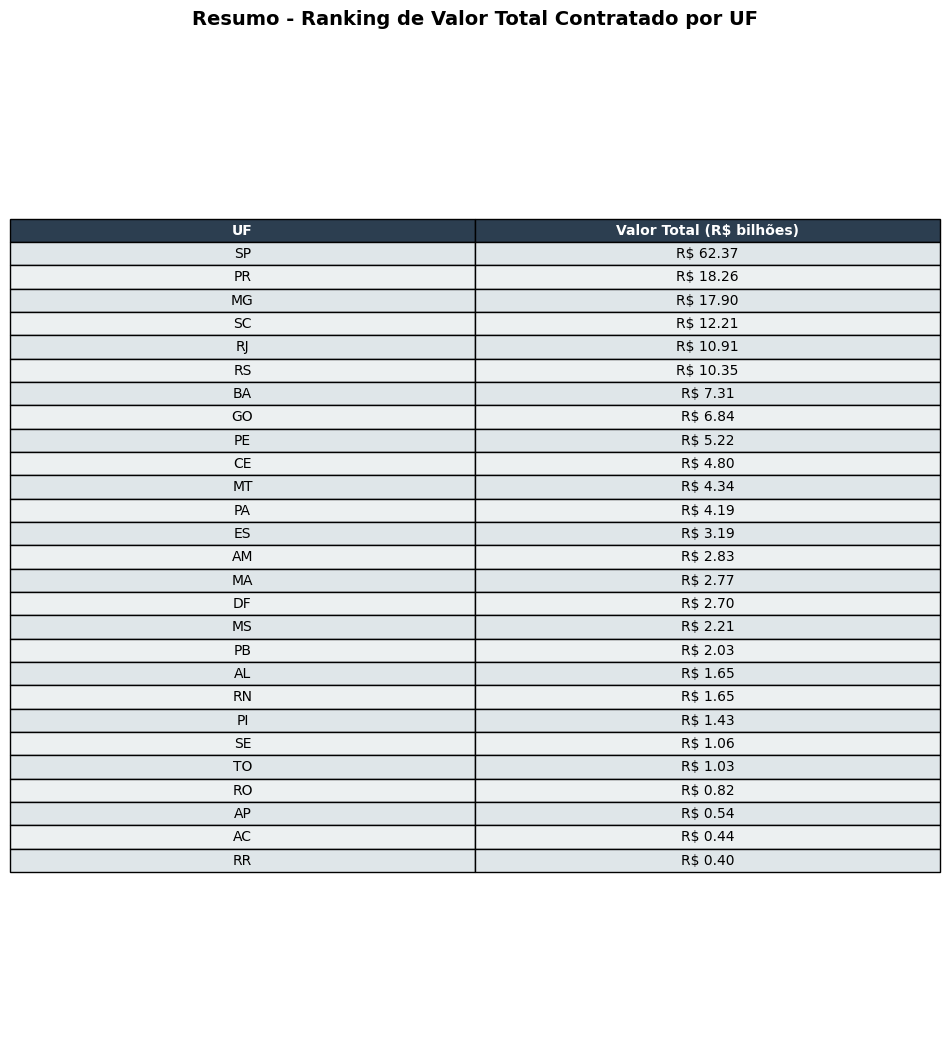

Tabela visual salva em: ../Resultados\tabela_ranking_uf.png


In [12]:

# %%
# === TABELA FORMATADA ===
tabela_display = ranking_uf[[col_uf, "valor_bi"]].copy()
tabela_display["valor_bi"] = tabela_display["valor_bi"].apply(lambda x: f"R$ {x:,.2f}")

fig, ax = plt.subplots(figsize=(10, len(tabela_display)*0.4 + 2))
ax.axis("off")

tabela = ax.table(
    cellText=tabela_display.values,
    colLabels=["UF", "Valor Total (R$ bilhões)"],
    cellLoc='center',
    loc='center'
)

# Estilos visuais
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1.2, 1.4)

for (i, j), cell in tabela.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#2c3e50')
    else:
        cell.set_facecolor('#ecf0f1' if i % 2 == 0 else '#dfe6e9')

plt.title("Resumo - Ranking de Valor Total Contratado por UF", fontsize=14, fontweight="bold", pad=20)
caminho_tabela = os.path.join(PASTA_RESULTADOS, "tabela_ranking_uf.png")
plt.savefig(caminho_tabela, dpi=300, bbox_inches="tight")
plt.show()

print(f"Tabela visual salva em: {caminho_tabela}")
